In [50]:
import numpy as np
import matplotlib.pyplot as plt
import control
from numpy.linalg import matrix_rank


## Exercise 1. 1.

In [51]:

m = 1888.6;
ca = 20000;
lf = 1.55;
lr = 1.39;
iz = 25854;
for i in range(3):
    if i == 0:
        vx = 2;
    elif i == 1:
        vx = 5;
    else:
        vx = 8;
    A = np.array([[0,1,0,0],
        [0,-4*ca/(m*vx),4*ca/m,-2*ca*(lf-lr)/(m*vx)],
        [0,0,0,1],
        [0,-2*ca*(lf-lr)/(iz*vx),2*ca*(lf-lr)/iz,-2*ca*(lf**2+lr**2)/(iz*vx)]]);
    B = np.array([[0,0],
        [2*ca/m,0],
        [0,0],
        [2*ca*lf/iz,0]]);

    C = np.array([[1,0,0,0],
        [0,1,0,0],
        [0,0,1,0],
        [0,0,0,1]]);

    P = np.hstack((B, np.matmul(A, B), np.matmul(np.linalg.matrix_power(A, 2), B), np.matmul(np.linalg.matrix_power(A, 3), B)))
    rP = matrix_rank(P)
    print('the rank of the controllability matrix when vx = ', vx, 'is')
    print(rP)
    Q = np.vstack((C, np.matmul(C, A), np.matmul(C, np.linalg.matrix_power(A, 2)), np.matmul(C, np.linalg.matrix_power(A, 3))))
    rQ = matrix_rank(Q)
    print('the rank of the observability matrix when vx = ', vx, 'is')
    print(rQ)
print('therefore the system is controllable and observable')

the rank of the controllability matrix when vx =  2 is
4
the rank of the observability matrix when vx =  2 is
4
the rank of the controllability matrix when vx =  5 is
4
the rank of the observability matrix when vx =  5 is
4
the rank of the controllability matrix when vx =  8 is
4
the rank of the observability matrix when vx =  8 is
4
therefore the system is controllable and observable


## Exercise 1. 2.a

Text(0, 0.5, '$\\log_{10}$ $\\dfrac{\\sigma_1}{\\sigma_n}$')

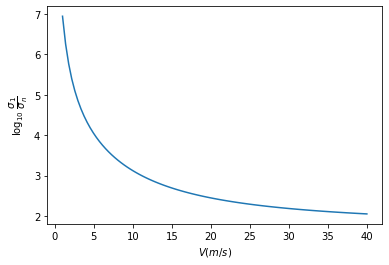

In [52]:
v = np.linspace(1, 40, 100)

y = []
real = []
for i in range(4):
    real.append([])
for i in range(len(v)):
    vTemp = v[i]
    A = np.array([[0,1,0,0],
        [0,-4*ca/(m*vTemp),4*ca/m,-2*ca*(lf-lr)/(m*vTemp)],
        [0,0,0,1],
        [0,-2*ca*(lf-lr)/(iz*vTemp),2*ca*(lf-lr)/iz,-2*ca*(lf**2+lr**2)/(iz*vTemp)]]);
    B = np.array([[0,0],
        [2*ca/m,0],
        [0,0],
        [2*ca*lf/iz,0]]);
    C = np.array([[1,0,0,0],
        [0,1,0,0],
        [0,0,1,0],
        [0,0,0,1]]);
    D = np.array([[0,0],[0,0],[0,0],[0,0]])
    P = np.hstack((B, np.matmul(A, B), np.matmul(np.linalg.matrix_power(A, 2), B), np.matmul(np.linalg.matrix_power(A, 3), B)))
    _, s, _ = np.linalg.svd(P)
    s1 = max(s)
    sn = min(s)
    y.append(np.log10(s1 / sn))
    sys = control.StateSpace(A, B, C, D)
    poles = control.pole(sys)
    for j in range(4):
        real[j].append(poles[j].real)
y = np.array(y)
real = np.array(real)
plt.figure()
plt.plot(v,y)
plt.xlabel('$V (m/s)$')
plt.ylabel('$\log_{10}$ $\dfrac{\sigma_1}{\sigma_n}$')

## Exercise 1. 2.b

Text(0, 0.5, '$Re(p_4)$')

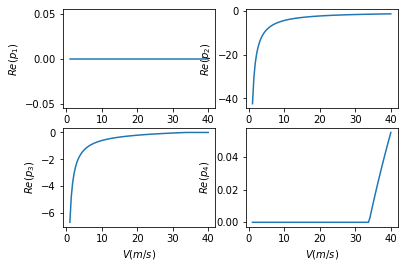

In [53]:
plt.figure()

plt.subplot(2, 2, 1)
plt.plot(v, real[0])
plt.xlabel('$V (m/s)$')
plt.ylabel('$Re(p_1)$')

plt.subplot(2, 2, 2)
plt.plot(v, real[1])
plt.xlabel('$V (m/s)$')
plt.ylabel('$Re(p_2)$')

plt.subplot(2, 2, 3)
plt.plot(v, real[2])
plt.xlabel('$V (m/s)$')
plt.ylabel('$Re(p_3)$')

plt.subplot(2, 2, 4)
plt.plot(v, real[3])
plt.xlabel('$V (m/s)$')
plt.ylabel('$Re(p_4)$')